In [20]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import nltk

In [21]:
TRAIN_PATH = os.path.join(os.getcwd(), 'data', 'train.csv')
TEST_PATH = os.path.join(os.getcwd(), 'data', 'test.csv')
VALIDATE_PATH = os.path.join(os.getcwd(), 'data', 'validate.csv')

## Data Loading

In [22]:
df = pd.read_csv(TRAIN_PATH)
df

,label,message
0,ham,Oh k. . I will come tomorrow
1,ham,What you doing?how are you?
2,spam,I am hot n horny and willing I live local to y...
3,ham,How much is torch in 9ja.
4,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
...,...,...
1165,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
1166,ham,"Wishing you and your family Merry ""X"" mas and ..."
1167,ham,Change again... It's e one next to escalator...
1168,spam,-PLS STOP bootydelious (32/F) is inviting you ...


## Data Exploration

In [23]:
df.describe()

,label,message
count,1170,1170
unique,2,1141
top,ham,I cant pick the phone right now. Pls send a me...
freq,998,5


In [24]:
df.isna().sum()

label      0
message    0
dtype: int64

In [25]:
df.duplicated().sum()

29

In [26]:
df[df.duplicated()]

,label,message
127,ham,I cant pick the phone right now. Pls send a me...
152,ham,Ok.
297,ham,"Sorry, I'll call later"
318,ham,Ok.
376,ham,No calls..messages..missed calls
407,ham,I cant pick the phone right now. Pls send a me...
449,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
552,ham,Ya very nice. . .be ready on thursday
578,ham,Love you aathi..love u lot..
597,ham,Today is ACCEPT DAY..U Accept me as? Brother S...


## Data Visualization

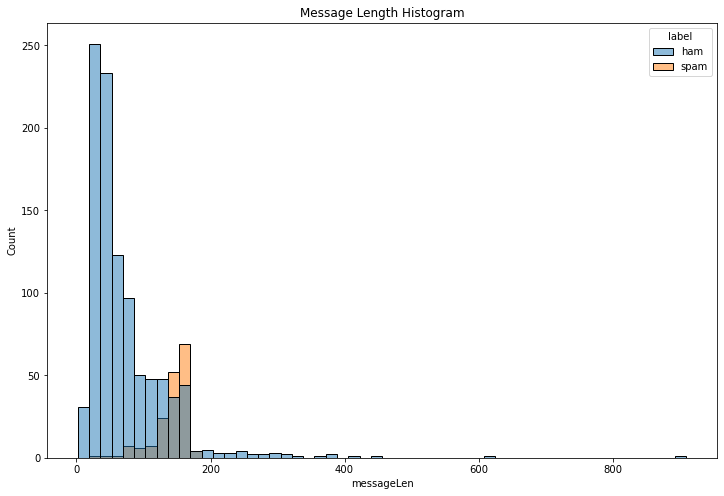

In [27]:
df['messageLen'] = df.message.apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x="messageLen", hue="label")
plt.title("Message Length Histogram")
plt.show()

In [28]:
# word cloud without cleaning
def showWC(label, colMessage):
    wc = WordCloud(
        background_color='white',
        max_words=200
    )

    wc.generate(' '.join(text for text in df.loc[df['label'] == label, colMessage]))
    plt.figure(figsize=(12, 8))
    plt.title(
        f'Top words for {label} messages', 
        fontdict={'size': 22,  
        'verticalalignment': 'bottom'}
    )
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

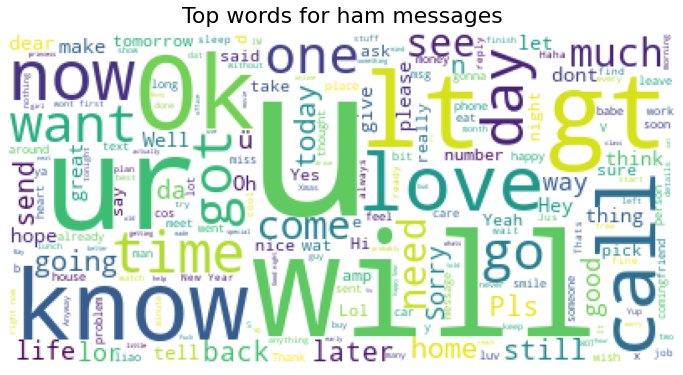

In [29]:
showWC('ham', 'message')

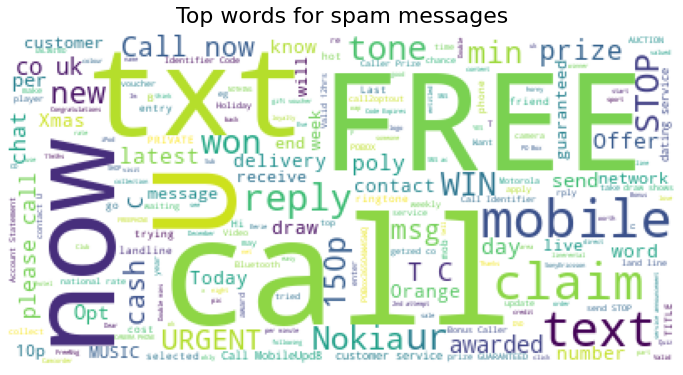

In [30]:
showWC('spam', 'message')

## Data Cleaning

In [31]:
def clean_text(text):
    # lowercase whole string
    text = str(text).lower()
    
    # remove special character & number
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

df['clean_text'] = df.message.apply(clean_text)

In [32]:
df.clean_text.duplicated().sum()

34

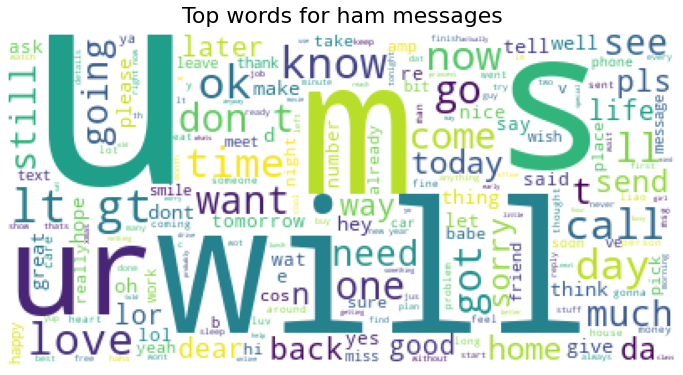

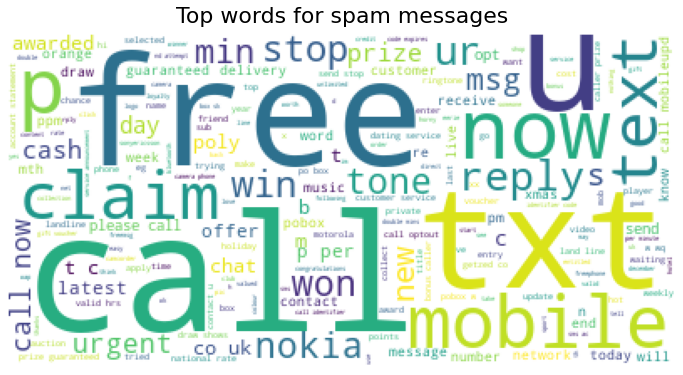

In [33]:
showWC('ham', 'clean_text')
showWC('spam', 'clean_text')

In [34]:
# additional resources
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    # after inspecting, add our own stopwords
    # more_stopwords = ['u', 'ur']
    # stop_words += more_stopwords

    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

df['clean_stopwords'] = df.clean_text.apply(remove_stopwords)
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isaac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message,messageLen,clean_text,clean_stopwords
0,ham,Oh k. . I will come tomorrow,28,oh k i will come tomorrow,oh k come tomorrow
1,ham,What you doing?how are you?,27,what you doing how are you,
2,spam,I am hot n horny and willing I live local to y...,155,i am hot n horny and willing i live local to y...,hot n horny willing live local text reply hear...
3,ham,How much is torch in 9ja.,25,how much is torch in ja,much torch ja
4,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...,60,baaaaaaaabe wake up i miss you i crave you i n...,baaaaaaaabe wake miss crave need
...,...,...,...,...,...
1165,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,101,hot live fantasies call now just p per min ntt...,hot live fantasies call p per min ntt ltd po b...
1166,ham,"Wishing you and your family Merry ""X"" mas and ...",73,wishing you and your family merry x mas and ha...,wishing family merry x mas happy new year adva...
1167,ham,Change again... It's e one next to escalator...,47,change again it s e one next to escalator,change e one next escalator
1168,spam,-PLS STOP bootydelious (32/F) is inviting you ...,152,pls stop bootydelious f is inviting you to be...,pls stop bootydelious f inviting friend reply...


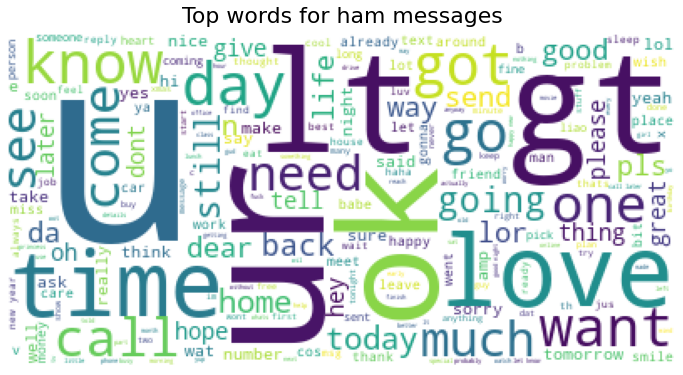

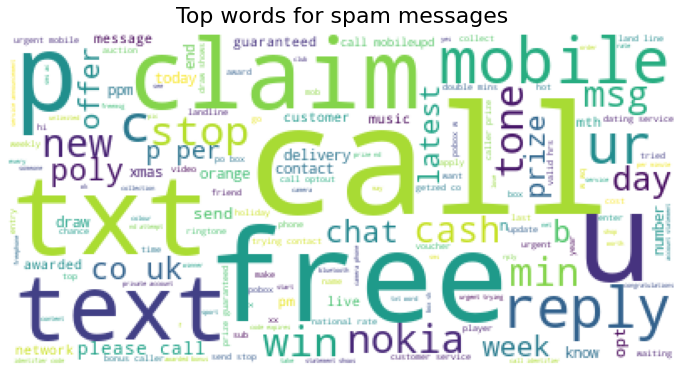

In [35]:
showWC('ham', 'clean_stopwords')
showWC('spam', 'clean_stopwords')

In [36]:
def stemm_text(text):
    stemmer = nltk.SnowballStemmer('english')
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

df['clean_stemm'] = df.clean_stopwords.apply(stemm_text)
df

,label,message,messageLen,clean_text,clean_stopwords,clean_stemm
0,ham,Oh k. . I will come tomorrow,28,oh k i will come tomorrow,oh k come tomorrow,oh k come tomorrow
1,ham,What you doing?how are you?,27,what you doing how are you,,
2,spam,I am hot n horny and willing I live local to y...,155,i am hot n horny and willing i live local to y...,hot n horny willing live local text reply hear...,hot n horni will live local text repli hear st...
3,ham,How much is torch in 9ja.,25,how much is torch in ja,much torch ja,much torch ja
4,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...,60,baaaaaaaabe wake up i miss you i crave you i n...,baaaaaaaabe wake miss crave need,baaaaaaaab wake miss crave need
...,...,...,...,...,...,...
1165,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,101,hot live fantasies call now just p per min ntt...,hot live fantasies call p per min ntt ltd po b...,hot live fantasi call p per min ntt ltd po box...
1166,ham,"Wishing you and your family Merry ""X"" mas and ...",73,wishing you and your family merry x mas and ha...,wishing family merry x mas happy new year adva...,wish famili merri x mas happi new year advanc
1167,ham,Change again... It's e one next to escalator...,47,change again it s e one next to escalator,change e one next escalator,chang e one next escal
1168,spam,-PLS STOP bootydelious (32/F) is inviting you ...,152,pls stop bootydelious f is inviting you to be...,pls stop bootydelious f inviting friend reply...,pls stop bootydeli f invit friend repli yes s...


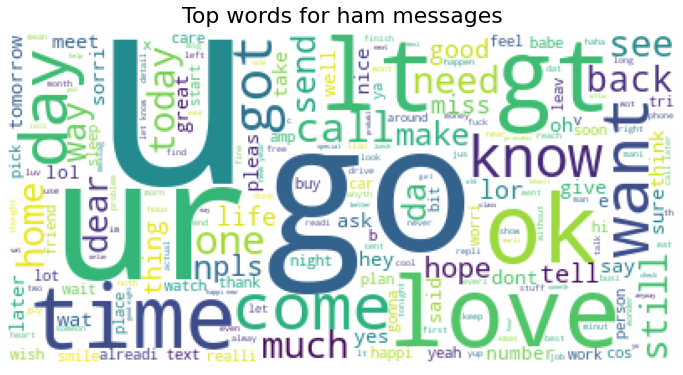

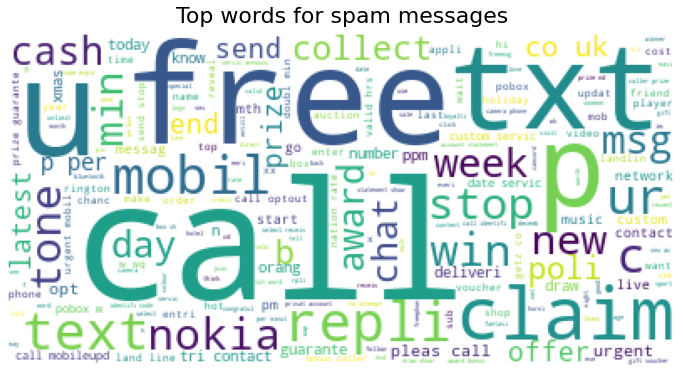

In [37]:
showWC('ham', 'clean_stemm')
showWC('spam', 'clean_stemm')